[0.         0.21666156 0.43332312 0.64998469 0.86664625 1.08330781
 1.29996937 1.51663094 1.7332925  1.94995406 2.16661562 2.38327719
 2.59993875 2.81660031 3.03326187 3.24992343 3.466585   3.68324656
 3.89990812 4.11656968 4.33323125 4.54989281 4.76655437 4.98321593
 5.1998775  5.41653906 5.63320062 5.84986218 6.06652374 6.28318531]
[1.41421362e-05 2.00334843e-01 2.83794110e-01 3.48166022e-01
 4.02715842e-01 4.51026812e-01 4.94934127e-01 5.35526654e-01
 5.73513105e-01 6.09385308e-01 6.43501109e-01 6.76130510e-01
 7.07483212e-01 7.37725969e-01 7.66994008e-01 7.95398830e-01
 8.23033692e-01 8.49977566e-01 8.76298061e-01 9.02053624e-01
 9.27295218e-01 9.52067636e-01 9.76410527e-01 1.00035922e+00
 1.02394538e+00 1.04719755e+00 1.07014161e+00 1.09280113e+00
 1.11519765e+00 1.13735101e+00 1.15927948e+00]


,beta,alpha
1,0.456682,0.716272
3,6.011837,1.028903
5,4.939282,0.552584
6,3.228859,0.017520
7,0.226893,0.885419
...,...,...
6538,0.218578,0.953885
6539,3.219099,0.734534
6540,3.099179,1.309222
6541,0.593412,0.717247


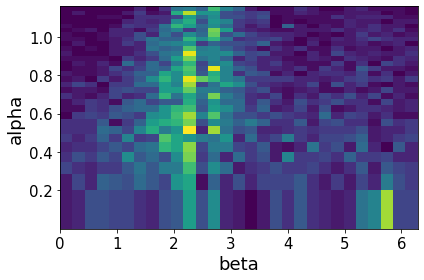

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

pi = np.pi

# Bin edges
binEdges_beta = np.linspace(0, 2*np.pi,30)

binEdges_alpha = np.linspace(0.4, 1, 31)
binEdges_alpha = binEdges_alpha[::-1]
binEdges_alpha = np.arccos(binEdges_alpha)

print(binEdges_beta)
print(binEdges_alpha)

data   = pd.read_hdf("MeasuredMuonsFromData.h5") # Read in data

display(data)

# Add 220deg to beta
data["beta"] = data["beta"] + pi*(220)/180 

# # Account for rotational symmetry
data.loc[data.beta>=pi*2, "beta"] = data["beta"] - pi*2
data.loc[data.beta<=0, "beta"] = data["beta"] + pi*2

# # Reverse direction of beta to opposite direction
data["beta"] = -1*(data["beta"] - pi*2)

hist_data= plt.hist2d(data["beta"], data["alpha"], bins=[binEdges_beta, binEdges_alpha]) 
# hist_data= plt.hist2d(data["beta"], data["alpha"], bins = 100) 
plt.xlabel("beta", fontsize=18)
plt.ylabel("alpha", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 
plt.tight_layout()
plt.show()


In [94]:
# data   = pd.read_hdf("MCFluxOutputs.h5")

# display(data)

# data["beta"] = data["beta"] + pi*(220)/180
# data.loc[data.beta>pi*2, "beta"] = data["beta"] - pi*2
# data.loc[data.beta<0, "beta"] = data["beta"] + pi*2
# data["beta"] = -1*(data["beta"] - pi*2)

# hist_data= plt.hist2d(data["beta"], data["alpha"],weights=data["SimWeightAvg"], bins=50) 
# plt.xlabel("beta", fontsize=18)
# plt.ylabel("alpha", fontsize=18)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15) 
# plt.tight_layout()
# plt.show()


In [95]:
# print(hist_data[0])
# print(hist_data[1]) # rows
# print(hist_data[2]) # columns

rows = []
columns = []

# Get the Bin Centers to loop over
for indx in range(0, len(hist_data[1])-1):
    rows.append( (hist_data[1][indx+1] - hist_data[1][indx])/2.0 + hist_data[1][indx])
    # print(rows[indx])

for indx in range(0, len(hist_data[2])-1):
    columns.append( (hist_data[2][indx+1] - hist_data[2][indx])/2.0 + hist_data[2][indx])
    # print(columns[indx])

# Loop over the histogram bins and create three arrays 
# print(len(hist_data[0][:]), len(rows), len(columns))


intensity = []
beta      = []
alpha     = []

for y in range(0, len(hist_data[0])):
    for x in range(0, len(hist_data[0][y])):
        # print(hist_data[0][y][x], rows[y], columns[x])
        intensity.append(hist_data[0][y][x])
        beta.append(rows[y])
        alpha.append(columns[x])
    
    # print(" ")

dict_ = {'Intenisty':intensity, 'beta': beta, 'alpha': alpha}

dataframe = pd.DataFrame(dict_)
display(dataframe)

,Intenisty,beta,alpha
0,2.0,0.108331,0.100174
1,2.0,0.108331,0.242064
2,6.0,0.108331,0.315980
3,4.0,0.108331,0.375441
4,3.0,0.108331,0.426871
...,...,...,...
865,0.0,6.174855,1.058670
866,2.0,6.174855,1.081471
867,1.0,6.174855,1.103999
868,0.0,6.174855,1.126274


In [96]:
# Write the data from hdf5 format to csv for reading into nexus
filepath = Path('MeasuredMuonsFromData.csv')  
dataframe.to_csv(filepath, index = False, header = False)  

# Write the bins to file 


